<a href="https://colab.research.google.com/github/BMOnoire/ACML/blob/master/text_mining_the_hobbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Text Mining Project - The Hobbit
---

## Config Variables

In [1]:

#import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')

list_of_chapters = {
  "Chapter I": "AN UNEXPECTED PARTY",
  "Chapter II": "ROAST MUTTON",
  "Chapter III": "A SHORT REST",
  "Chapter IV": "OVER HILL AND UNDER HILL",
  "Chapter V": "RIDDLES IN THE DARK",
  "Chapter VI": "OUT OF THE FRYING-PAN INTO THE FIRE",
  "Chapter VII": "QUEER LODGINGS",
  "Chapter VIII": "FLIES AND SPIDERS",
  "Chapter IX": "BARRELS OUT OF BOND",
  "Chapter X": "A WARM WELCOME",
  "Chapter XI": "ON THE DOORSTEP",
  "Chapter XII": "INSIDE INFORMATION",
  "Chapter XIII": "NOT AT HOME",
  "Chapter XIV": "FIRE AND WATER",
  "Chapter XV": "THE GATHERING OF THE CLOUDS",
  "Chapter XVI": "A THIEF IN THE NIGHT",
  "Chapter XVII": "THE CLOUDS BURST",
  "Chapter XVIII": "THE RETURN JOURNEY",
  "Chapter XIX": "THE LAST STAGE"
}

MODIFY_STRANGE_CHARS = True

SENTIMENT_ANALYSIS = True

---
Upload the book
---

In [2]:
# import a repository from github
REPO_NAME = "https://github.com/BMOnoire/text-mining-master-project"
print("IMPORT", REPO_NAME)
!git clone $REPO_NAME

IMPORT https://github.com/BMOnoire/text-mining-master-project
fatal: destination path 'text-mining-master-project' already exists and is not an empty directory.


---
Preprocess the test
---

there are special characters that mess with the division into sentences so I have to see how to modify them all and whether modifying them or not what it means in quality

In [3]:
import re
import string
import nltk
nltk.download("book")
import pandas as pd
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

In [4]:
# TEST
text = open('text-mining-master-project/the_hobbit.txt', 'r').read()

text = text.replace('\n', '')

string.punctuation += '—'
regex = re.compile('[a-zA-Z0-9\s' + string.punctuation + "]")
#First parameter is the replacement, second parameter is your input string

print(regex.sub('', text))

# to see more of the sentences in pandas
# %load_ext google.colab.data_table 


print("\n\n#######\n\n")
sentences = nltk.sent_tokenize(text)
print("there are", len(sentences),"sentences\n")


# [ \ ]  And with that Ya hoy\ the flames were under Gandalf's tree.
# [ • ■ £ ]  The Elvenking's Gate 1 p -s. Tii Tn^ir - j i ■■• * ■ — .i- -_£ 1 i/>j p'v : mm The prisoners were brought before him; and though he looked grimly at them, he told his men to unbind them, for they were ragged and weary.
# [ ¬ ]  annoyng behaviour check everytime
# [ ‘ ’ ] casino perchè preannuncia un dialogo interiore???, capire cosa bisogna fare qua

df = pd.DataFrame(sentences, columns=['sentence'])

df[df['sentence'].str.contains(r"\*")]


’’’’“”’“”»\•‘\«»»«»¥‘\»’••’’•►’’“”“”“”“”“’”“”“’”“’”¬“”“’”“”“’”“’”“’’”“’’”“”“”“”“’”“’”“”“’”“”’“”“”“”“”“”“”“”’“”“”“”“”“’”“”“”“”“”“”“’”“”“”“”“’”“”“”“”“”’“”“”“”’“’”“”“’”“”“”“”“”“’”“’”“”“”“”“’”“”“”“’”“”“’”’’’’’’“”“”“”“”’’’“”’“”“”“”“”“”“”“”“”’’“”“”“”’¬’’“”“”“”“”“’”““”“’’”“”“”“’”“’’”“”’“”“’”“”“”“”“’”“”“”“”“’”“”“‘’”“”“”“”“’’’”“”“”“”“”“”“”“”“”“”“”“’”“”“”“”“”“”“’’’”“”’“”“”“”“’’“’’’’“”““’’”“’”“”“”“”“”“”“’”“”“’”“”“”“”“”“’”“”“”“”“’”“’”“”“’’’’”’“”“’”“”“”“”“”“”“”“’”“”“““““”“”“”“”“”“”’“”“”“’”“’’”“’”“’’”’’’’’“”“’”“”“”“”’“’”“”“”“”“”“”“”“’”“”“’”“”’’“’”“”“’’’’”“”“’’’’’‘’’”’’’’“”“”’“’’”“’”“”“”“”“”“’”“’”“”“’”“”“’”“’”’“”“”“’”“”“’’’”“”“”“”“’”“’”“”“’”“’”“’”“’”’’’“”“’”“’”“’”“’”“’”“’’”’’“’”“’”“’”“”’’’’“’’”’“’”“”“’”“”“’”“’’’”’“”“’”“”’“’’”“’”“”“”“”“’”“”“”“”’“”“”“”“”“”“”“”“’”“”“’’’”“”’’“”’’“”“”“’’”“’”’“”“”“’”“”“”“’”’“”“”“”“”“”“”“”“’”“’”“’’“”“”’“”“”“”“”“”“”“”’’“”’“”’“”“’”“”“”“”“”“”“”“’”“”“’”“”“”“”’’“’”“”“”“”“”“”“”“”“”“‘”’“”“”“’”“”“”“’”“”“”“’”“’”“’”“”“”“”’’“”“”“’”“’”“’”“”“”“”“”“”“’”’’’’’’’“”“”’“”“”“’’”“”“”“”“’”“”“”“”

,sentence
9,Douglas A. Anderson May 2001 GvS?- lit tVw Inm...
10,fo iWf 2 or« * A»» rti« C»r< y (Mountain s kt ...
29,The moon-runes read by Elrond HtF+M ffi XRMR h...
2843,The Elvenking's Gate 1 p -s. Tii Tn^ir - j i ■...


In [5]:
text = open('text-mining-master-project/the_hobbit.txt', 'r').read()
text[:2000]

'THE \n\nHOBBIT \n\n\n\n\nTRR- TOLKIEN \n\n\n75 T " ANNIVERSARY EDITION \n\n\n\nTHE HOBBIT \nOR \n\nTHERE AND BACK AGAIN \nBY \n\nJ.R.R. TOLKIEN \n\n\n\nHoughton Mifflin Harcourt \n\n\nCONTENTS \n\n\nTITLE PAGE \n\nLIST OF ILLUSTRATIONS \n\nNOTE ON THE TEXT \n\nAUTHOR’S NOTE \n\nCHAPTER I: AN UNEXPECTED PARTY \n\nCHAPTER II: ROAST MUTTON \n\nCHAPTER III: A SHORT REST \n\nCHAPTER IV: OVER HILL AND UNDER HILL \n\nCHAPTER V: RIDDLES IN THE DARK \n\nCHAPTER VI: OUT OF THE FRYING-PAN INTO THE FIRE \n\nCHAPTER VII: QUEER LODGINGS \n\nCHAPTER VIII: FLIES AND SPIDERS \n\nCHAPTER IX: BARRELS OUT OF BOND \n\nCHAPTER X: A WARM WELCOME \n\nCHAPTER XI: ON THE DOORSTEP \n\nCHAPTER XII: INSIDE INFORMATION \n\nCHAPTER XIII: NOT AT HOME \n\nCHAPTER XIV: FIRE AND WATER \n\nCHAPTER XV: THE GATHERING OF THE CLOUDS \n\nCHAPTER XVI: A THIEF IN THE NIGHT \n\nCHAPTER XVII: THE CLOUDS BURST \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCHAPTER XVIII: THE RETURN JOURNEY \n\n\nCHAPTER XIX: THE LAST STAGE \n\nW

In [6]:
text = text.replace('\n', '')
text = text.replace('\\', '')
text = text.replace('¬ ', '-')
text = text.replace('The Elvenking\'s Gate 1 p -s. Tii Tn^ir - j i ■■• * ■ — .i- -_£ 1 i/>j p\'v : mm', '') # remove a lot of noisy chars
text = text.replace('. . .','...')
text = text.replace('! ! !','!!!')
text = text.replace('. .','..')
text = text.replace('! !','!!')

if MODIFY_STRANGE_CHARS:
  text = text.replace('“', '"')
  text = text.replace('”', '"')
  text = text.replace('’', "'")
  text = text.replace('‘', "'") 
  
print(text[:200])

THE HOBBIT TRR- TOLKIEN 75 T " ANNIVERSARY EDITION THE HOBBIT OR THERE AND BACK AGAIN BY J.R.R. TOLKIEN Houghton Mifflin Harcourt CONTENTS TITLE PAGE LIST OF ILLUSTRATIONS NOTE ON THE TEXT AUTHOR'S NO


In [7]:
sentences = nltk.sent_tokenize(text)
print("there are", len(sentences),"sentences\n")
sentences[:20]

there are 5914 sentences



['THE HOBBIT TRR- TOLKIEN 75 T " ANNIVERSARY EDITION THE HOBBIT OR THERE AND BACK AGAIN BY J.R.R.',
 "TOLKIEN Houghton Mifflin Harcourt CONTENTS TITLE PAGE LIST OF ILLUSTRATIONS NOTE ON THE TEXT AUTHOR'S NOTE CHAPTER I: AN UNEXPECTED PARTY CHAPTER II: ROAST MUTTON CHAPTER III: A SHORT REST CHAPTER IV: OVER HILL AND UNDER HILL CHAPTER V: RIDDLES IN THE DARK CHAPTER VI: OUT OF THE FRYING-PAN INTO THE FIRE CHAPTER VII: QUEER LODGINGS CHAPTER VIII: FLIES AND SPIDERS CHAPTER IX: BARRELS OUT OF BOND CHAPTER X: A WARM WELCOME CHAPTER XI: ON THE DOORSTEP CHAPTER XII: INSIDE INFORMATION CHAPTER XIII: NOT AT HOME CHAPTER XIV: FIRE AND WATER CHAPTER XV: THE GATHERING OF THE CLOUDS CHAPTER XVI: A THIEF IN THE NIGHT CHAPTER XVII: THE CLOUDS BURST CHAPTER XVIII: THE RETURN JOURNEY CHAPTER XIX: THE LAST STAGE WORKS BY J.R.R.",
 "TOLKIEN COPYRIGHT ILLUSTRATIONS Thror's Map The Trolls The Mountain-path The Misty Mountains looking West Beorn's Hall The Elvenking's Gate Lake Town The Front Gate The Hall 

In [8]:
# select only the story

for i, sentence in enumerate(sentences):
  if re.search(r'\AChapter I AN UNEXPECTED PARTY', sentence):
    init_bound = i
  if re.search(r'said Bilbo laughing, and handed him the tobacco-jar.\Z', sentence):
    end_bound = i

sentences = sentences[init_bound:end_bound+1]


print("FIRST -> ", sentences[0])
print("LAST  -> ", sentences[-1])

FIRST ->  Chapter I AN UNEXPECTED PARTY In a hole in the ground there lived a hobbit.
LAST  ->  said Bilbo laughing, and handed him the tobacco-jar.


In [9]:
# find chapters' first sentences
for i, sentence in enumerate(sentences):
  if re.search(r'Chapter', sentence):
    print(str(i),"\t", sentence)


0 	 Chapter I AN UNEXPECTED PARTY In a hole in the ground there lived a hobbit.
520 	 Chapter II ROAST MUTTON Up jumped Bilbo, and putting on his dressing-gown went into the dining-room.
886 	 Chapter III A SHORT REST They did not sing or tell stories that day, even though the weather improved; nor the next day, nor the day after.
1075 	 Chapter IV OVER HILL AND UNDER HILL There were many paths that led up into those mountains, and many passes over them.
1315 	 Chapter V RIDDLES IN THE DARK When Bilbo opened his eyes, he wondered if he had; for it was just as dark as with them shut.
1874 	 Chapter VI OUT OF THE FRYING-PAN INTO THE FIRE Bilbo had escaped the goblins, but he did not know where he was.
2260 	 Chapter VII QUEER LODGINGS The next morning Bilbo woke up with the early sun in his eyes.
2811 	 Chapter VIII FLIES AND SPIDERS They walked in single file.
3360 	 Chapter IX BARRELS OUT OF BOND The day after the battle with the spiders Bilbo and the dwarves made one last despairing e

In [10]:
import pandas as pd
import numpy as np

df = pd.DataFrame(sentences, columns=['sentence'])
df['chapter'] = np.where(
    df['sentence'].str.startswith('Chapter'), 
    df['sentence'].str.split(' ').str[:2], 
    np.nan
 )
df['chapter'] = df['chapter'].str[0] + ' ' + df['chapter'].str[1]


df.loc[df['chapter'].notnull()] # show all first sentences of chapters

,sentence,chapter
0,Chapter I AN UNEXPECTED PARTY In a hole in the...,Chapter I
520,"Chapter II ROAST MUTTON Up jumped Bilbo, and p...",Chapter II
886,Chapter III A SHORT REST They did not sing or ...,Chapter III
1075,Chapter IV OVER HILL AND UNDER HILL There were...,Chapter IV
1315,Chapter V RIDDLES IN THE DARK When Bilbo opene...,Chapter V
1874,Chapter VI OUT OF THE FRYING-PAN INTO THE FIRE...,Chapter VI
2260,Chapter VII QUEER LODGINGS The next morning Bi...,Chapter VII
2811,Chapter VIII FLIES AND SPIDERS They walked in ...,Chapter VIII
3360,Chapter IX BARRELS OUT OF BOND The day after t...,Chapter IX
3650,Chapter X A WARM WELCOME The day grew lighter ...,Chapter X


In [11]:
#dcopy = df.copy()
df['chapter_name'] = df['sentence'].str.extract(r'\AChapter [A-Z]* ([A-Z\s\-]+) ')
df['sentence'] = df['sentence'].str.replace(r'\AChapter [A-Z\s\-]+ ', '') # remove all the titles in caps lock
df.loc[df['chapter'].notnull()]

,sentence,chapter,chapter_name
0,In a hole in the ground there lived a hobbit.,Chapter I,AN UNEXPECTED PARTY
520,"Up jumped Bilbo, and putting on his dressing-g...",Chapter II,ROAST MUTTON
886,"They did not sing or tell stories that day, ev...",Chapter III,A SHORT REST
1075,There were many paths that led up into those m...,Chapter IV,OVER HILL AND UNDER HILL
1315,"When Bilbo opened his eyes, he wondered if he ...",Chapter V,RIDDLES IN THE DARK
1874,"Bilbo had escaped the goblins, but he did not ...",Chapter VI,OUT OF THE FRYING-PAN INTO THE FIRE
2260,The next morning Bilbo woke up with the early ...,Chapter VII,QUEER LODGINGS
2811,They walked in single file.,Chapter VIII,FLIES AND SPIDERS
3360,The day after the battle with the spiders Bilb...,Chapter IX,BARRELS OUT OF BOND
3650,The day grew lighter and warmer as they floate...,Chapter X,A WARM WELCOME


In [12]:
df.fillna(method='ffill', inplace=True) # fill Nan values with the not null chapter element before them
df.dropna(inplace=True) #clean all possible "something went wrong"

df.head(10)


,sentence,chapter,chapter_name
0,In a hole in the ground there lived a hobbit.,Chapter I,AN UNEXPECTED PARTY
1,"Not a nasty, dirty, wet hole, filled with the ...",Chapter I,AN UNEXPECTED PARTY
2,"It had a perfectly round door like a porthole,...",Chapter I,AN UNEXPECTED PARTY
3,The door opened on to a tube-shaped hall like ...,Chapter I,AN UNEXPECTED PARTY
4,"The tunnel wound on and on, going fairly but n...",Chapter I,AN UNEXPECTED PARTY
5,"No going upstairs for the hobbit: bedrooms, ba...",Chapter I,AN UNEXPECTED PARTY
6,The best rooms were all on the left-hand side ...,Chapter I,AN UNEXPECTED PARTY
7,"This hobbit was a very well-to-do hobbit, and ...",Chapter I,AN UNEXPECTED PARTY
8,The Bagginses had lived in the neighbourhood o...,Chapter I,AN UNEXPECTED PARTY
9,This is a story of how a Baggins had an advent...,Chapter I,AN UNEXPECTED PARTY


---
Text Analysis
---

In [13]:
import string
import pprint
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [14]:
string.punctuation += '‘—'

if not MODIFY_STRANGE_CHARS:
  string.punctuation += '“”'

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~—‘—'

In [15]:
# clean senteces from punctuation


#translator = str.maketrans('', '', string.punctuation)
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
pprint.pprint(translator)
df['cleaned_sentence'] = df['sentence'].apply(lambda x: x.translate(translator))

df['sentence'].loc[2418]

{33: 32,
 34: 32,
 35: 32,
 36: 32,
 37: 32,
 38: 32,
 39: 32,
 40: 32,
 41: 32,
 42: 32,
 43: 32,
 44: 32,
 45: 32,
 46: 32,
 47: 32,
 58: 32,
 59: 32,
 60: 32,
 61: 32,
 62: 32,
 63: 32,
 64: 32,
 91: 32,
 92: 32,
 93: 32,
 94: 32,
 95: 32,
 96: 32,
 123: 32,
 124: 32,
 125: 32,
 126: 32,
 8212: 32,
 8216: 32}


'"Goblins?"'

In [16]:
df['cleaned_sentence'] = df['cleaned_sentence'].str.strip()

double_space_exist = max(df['cleaned_sentence'].str.count("  "))
while double_space_exist:
  double_space_exist = max(df['cleaned_sentence'].str.count("  ")) 
  print("There is at least one sentence with", double_space_exist, "double space")
  df['cleaned_sentence'] = df['cleaned_sentence'].str.replace('  ', ' ')

df['cleaned_sentence'].loc[2418]

There is at least one sentence with 18 double space
There is at least one sentence with 5 double space
There is at least one sentence with 1 double space
There is at least one sentence with 0 double space


'Goblins'

In [17]:
df

,sentence,chapter,chapter_name,cleaned_sentence
0,In a hole in the ground there lived a hobbit.,Chapter I,AN UNEXPECTED PARTY,In a hole in the ground there lived a hobbit
1,"Not a nasty, dirty, wet hole, filled with the ...",Chapter I,AN UNEXPECTED PARTY,Not a nasty dirty wet hole filled with the end...
2,"It had a perfectly round door like a porthole,...",Chapter I,AN UNEXPECTED PARTY,It had a perfectly round door like a porthole ...
3,The door opened on to a tube-shaped hall like ...,Chapter I,AN UNEXPECTED PARTY,The door opened on to a tube shaped hall like ...
4,"The tunnel wound on and on, going fairly but n...",Chapter I,AN UNEXPECTED PARTY,The tunnel wound on and on going fairly but no...
...,...,...,...,...
5873,"Surely you don't disbelieve the prophecies, be...",Chapter XIX,THE LAST STAGE,Surely you don t disbelieve the prophecies bec...
5874,"You don't really suppose, do you, that all you...",Chapter XIX,THE LAST STAGE,You don t really suppose do you that all your ...
5875,"You are a very fine person, Mr. Baggins, and I...",Chapter XIX,THE LAST STAGE,You are a very fine person Mr Baggins and I am...
5876,"""Thank goodness!""",Chapter XIX,THE LAST STAGE,Thank goodness


In [18]:
# to avoid that this following sentences will crash the pos_tag I will add none 
# FIXED.. i changed ". . ." with "..."
print(df['sentence'].loc[2430])
print(df['sentence'].loc[2431])
print(df['sentence'].loc[2432])
print("\n")

for i in range(len(df)):
    if df['cleaned_sentence'].loc[i] == '':
        print(str(i), '->', df['sentence'].loc[i])
        df['cleaned_sentence'].loc[i] = 'none'

"I was coming over the mountains with a friend or two..." said the wizard.
"Or two?
I can only see one, and a little one at that," said Beorn.




In [19]:
df['tagged_sent'] = df['cleaned_sentence'].str.split(' ').apply(lambda x: nltk.pos_tag(x))
df.loc[2430]['tagged_sent']

[('I', 'PRP'),
 ('was', 'VBD'),
 ('coming', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('mountains', 'NNS'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('friend', 'NN'),
 ('or', 'CC'),
 ('two', 'CD'),
 ('said', 'VBD'),
 ('the', 'DT'),
 ('wizard', 'NN')]

In [20]:
# vediamo se cancellarlo o meno visto che non lo posso vedere su colab
df['ne'] = df['tagged_sent'].apply(lambda x: nltk.ne_chunk(x, binary=True))
print(df.loc[2430]['ne'])

(S
  I/PRP
  was/VBD
  coming/VBG
  over/IN
  the/DT
  mountains/NNS
  with/IN
  a/DT
  friend/NN
  or/CC
  two/CD
  said/VBD
  the/DT
  wizard/NN)


In [21]:
df.loc[205]['ne'].subtrees

<bound method Tree.subtrees of Tree('S', [Tree('NE', [('Thorin', 'NNP')]), ('indeed', 'RB'), ('was', 'VBD'), ('very', 'RB'), ('haughty', 'JJ'), ('and', 'CC'), ('said', 'VBD'), ('nothing', 'NN'), ('about', 'IN'), ('service', 'NN'), ('but', 'CC'), ('poor', 'JJ'), ('Mr', 'NNP'), Tree('NE', [('Baggins', 'NNP')]), ('said', 'VBD'), ('he', 'PRP'), ('was', 'VBD'), ('sorry', 'RB'), ('so', 'RB'), ('many', 'JJ'), ('times', 'NNS'), ('that', 'WDT'), ('at', 'IN'), ('last', 'JJ'), ('he', 'PRP'), ('grunted', 'VBD'), ('pray', 'JJ'), ('don', 'NN'), ('t', 'NN'), ('mention', 'NN'), ('it', 'PRP'), ('and', 'CC'), ('stopped', 'VBD'), ('frowning', 'VBG')])>

In [22]:
# change named entities to a list
df['named_entities'] = ''

for i in range(len(df)):
    df['named_entities'].loc[i] = [" ".join(w for w, t in elt) for elt in df.loc[i]['ne'] if isinstance(elt, nltk.Tree)]

In [23]:
df.loc[205]['named_entities']

['Thorin', 'Baggins']

In [24]:
# split two-word named entities
df['named_entities'] = df['named_entities'].apply(lambda x: [el.split(' ') for el in x])

In [25]:
# flatten named entities list
df['named_entities'] = df['named_entities'].apply(lambda x: [item for sublist in x for item in sublist])

In [26]:
df['named_entities'].loc[205]

['Thorin', 'Baggins']

In [27]:
wordnet_lemmatizer = WordNetLemmatizer()

In [28]:
words.words()

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron',
 'Aaronic',
 'Aaronical',
 'Aaronite',
 'Aaronitic',
 'Aaru',
 'Ab',
 'aba',
 'Ababdeh',
 'Ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'Abadite',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'Abama',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'Abanic',
 'Abantes',
 'abaptiston',
 'Abarambo',
 'Abaris',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'Abasgi',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'Abassin',
 'abastardize',
 'abatable',
 'abate

In [29]:
wordnet_lemmatizer.lemmatize('bilbo', 'v') in words.words()

True

In [30]:
wordnet_lemmatizer.lemmatize('gandalf', 'v') in words.words()

False

In [31]:
%%time
# now I want to remove false entities that are common words but because of being capitalised were counted as named entities
df['named_entities'] = df['named_entities'].apply(lambda x: [el for el in x if wordnet_lemmatizer.lemmatize(el.lower(), 'v') not in words.words() ]) #or el == 'Bilbo'
# DURA UN DISASTRO 4.17 min

CPU times: user 3min 58s, sys: 4.09 s, total: 4min 2s
Wall time: 4min 4s


In [32]:
df['named_entities'].loc[205]

['Thorin', 'Baggins']

In [33]:
unique_ne = []
for i in range(len(df)):
    unique_ne += [x for x in df['named_entities'].iloc[i]]

In [34]:
set(unique_ne)

{'Aren',
 'Arkenstone',
 'Armies',
 'Asa',
 'Avery',
 'Baggins',
 'Bagginses',
 'Balin',
 'Beorn',
 'Bert',
 'Bifur',
 'Blimey',
 'Bofur',
 'Bolg',
 'Bombur',
 'Bullroarer',
 'Bywater',
 'Calamities',
 'Carrock',
 'Chestnuts',
 'Co',
 'Couldn',
 'Dori',
 'Dorks',
 'Dorwinion',
 'Durin',
 'Dwalin',
 'Dwarves',
 'Elrond',
 'Elven',
 'Elvenking',
 'Eront',
 'Esgaroth',
 'Fili',
 'Galion',
 'Gandalf',
 'Girion',
 'Gloin',
 'Goblins',
 'Golfimbul',
 'Gollum',
 'GollunTs',
 'Gondolin',
 'Greatest',
 'Grubb',
 'Hadn',
 'Halls',
 'Hmmm',
 'Hobbit',
 'Hobbiton',
 'Huggins',
 'Hullo',
 'Isn',
 'Kili',
 'Longbeards',
 'Lorest',
 'Luckwearer',
 'Lumme',
 'Marshes',
 'Mirkwood',
 'Moria',
 'Mountains',
 'Oakenshield',
 'Oin',
 'Orcrist',
 'Ori',
 'Others',
 'Paths',
 'Praps',
 'Quicker',
 'Ravenhill',
 'Ringwinner',
 'Rivendell',
 'Roac',
 'Roads',
 'Sackville',
 'Smaug',
 'Ssss',
 'Sssss',
 'Thorin',
 'Thror',
 'Tom',
 'Tookish',
 'Tookishly',
 'Tookishness',
 'Tooks',
 'Wargs',
 'Weren',
 'Wilder

In [35]:
ne_lengths = []
max_named_entities_sentence = 0
for i in range(len(df)):
    if len(df['named_entities'].loc[i]) == 10:
        max_named_entities_sentence = i
    ne_lengths.append(len(df['named_entities'].loc[i]))

In [36]:
max(ne_lengths)

13

In [37]:
# What is the sentence with highest number of named enitities?
print(df.loc[max_named_entities_sentence]['sentence'])

Soon Dwalin lay by Balin, and Fili and Kili together, and Dori and Nori and Ori all in a heap, and Oin and Gloin and Bifur and Bofur and Bombur piled uncomfortably near the fire.


In [38]:
df['named_entities'].loc[max_named_entities_sentence]

['Dwalin',
 'Balin',
 'Fili',
 'Kili',
 'Dori',
 'Oin',
 'Gloin',
 'Bifur',
 'Bofur',
 'Bombur']

In [39]:
# getting a clean list of named entities
ne_interactions = [x for x in df['named_entities'].values if len(x) > 1]

In [40]:
unique_named_entities = [item for sublist in ne_interactions for item in sublist]

In [41]:
unique_named_entities = list(set(unique_named_entities))

In [42]:
unique_named_entities

['Luckwearer',
 'Tooks',
 'Sssss',
 'Baggins',
 'Dori',
 'Bombur',
 'Calamities',
 'Mountains',
 'Thror',
 'Bofur',
 'Blimey',
 'Balin',
 'Moria',
 'Bifur',
 'Thorin',
 'Rivendell',
 'Dorks',
 'Dwarves',
 'Roac',
 'William',
 'Huggins',
 'Ori',
 'Co',
 'Esgaroth',
 'Beorn',
 'Orcrist',
 'Oin',
 'Bullroarer',
 'Tom',
 'Elrond',
 'Gondolin',
 'Mirkwood',
 'Gollum',
 'Bert',
 'Durin',
 'Ringwinner',
 'Wolves',
 'Sackville',
 'Grubb',
 'Goblins',
 'Smaug',
 'Greatest',
 'Bagginses',
 'Hobbiton',
 'Gandalf',
 'Carrock',
 'Wargs',
 'Fili',
 'Others',
 'Elven',
 'Bolg',
 'Gloin',
 'Dwalin',
 'Oakenshield',
 'Wilderland',
 'Tookish',
 'Kili']

In [43]:
unique_named_entities = [x for x in unique_named_entities if x not in ['Others', 'Goodbye', 'Wolves', 'foRosmi', 'Sssss', 'Fal', 'Roac', 'Mountains', 'Twentysecond', 'Co', 'Wheres',
'Tralalalally', 'Others', 'Blimey', 'Maytime']]

In [44]:
for name in unique_named_entities:
    df[name] = 0

In [45]:
# creating a column for each name from the cleaned list
for i in range(len(df)):
    for name in unique_named_entities:
        if name in df.loc[i]['named_entities']:
            df[name].iloc[i] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [46]:
df['Gandalf'].sum()

151

In [47]:
df.columns

Index(['sentence', 'chapter', 'chapter_name', 'cleaned_sentence',
       'tagged_sent', 'ne', 'named_entities', 'Luckwearer', 'Tooks', 'Baggins',
       'Dori', 'Bombur', 'Calamities', 'Thror', 'Bofur', 'Balin', 'Moria',
       'Bifur', 'Thorin', 'Rivendell', 'Dorks', 'Dwarves', 'William',
       'Huggins', 'Ori', 'Esgaroth', 'Beorn', 'Orcrist', 'Oin', 'Bullroarer',
       'Tom', 'Elrond', 'Gondolin', 'Mirkwood', 'Gollum', 'Bert', 'Durin',
       'Ringwinner', 'Sackville', 'Grubb', 'Goblins', 'Smaug', 'Greatest',
       'Bagginses', 'Hobbiton', 'Gandalf', 'Carrock', 'Wargs', 'Fili', 'Elven',
       'Bolg', 'Gloin', 'Dwalin', 'Oakenshield', 'Wilderland', 'Tookish',
       'Kili'],
      dtype='object')

In [48]:
grammar = "NP: {<NNP>?<CC|TO>?<VBD>?<IN>?<NNP><CC|TO>?<VBD>?<IN>?<NNP><CC|TO>?<VBD>?<IN>?<NNP>?}"

In [49]:
cp = nltk.RegexpParser(grammar)

In [50]:
df['sentence'].loc[max_named_entities_sentence]

'Soon Dwalin lay by Balin, and Fili and Kili together, and Dori and Nori and Ori all in a heap, and Oin and Gloin and Bifur and Bofur and Bombur piled uncomfortably near the fire.'

In [51]:
df['chunk'] = df['tagged_sent'].apply(lambda x: cp.parse(x))

In [52]:

df.loc[max_named_entities_sentence]['chunk']

TclError: ignored

Tree('S', [('Soon', 'RB'), ('Dwalin', 'NNP'), ('lay', 'NN'), Tree('NP', [('by', 'IN'), ('Balin', 'NNP'), ('and', 'CC'), ('Fili', 'NNP'), ('and', 'CC'), ('Kili', 'NNP')]), ('together', 'RB'), Tree('NP', [('and', 'CC'), ('Dori', 'NNP'), ('and', 'CC'), ('Nori', 'NNP'), ('and', 'CC'), ('Ori', 'NNP')]), ('all', 'DT'), ('in', 'IN'), ('a', 'DT'), ('heap', 'NN'), Tree('NP', [('and', 'CC'), ('Oin', 'NNP'), ('and', 'CC'), ('Gloin', 'NNP'), ('and', 'CC'), ('Bifur', 'NNP')]), Tree('NP', [('and', 'CC'), ('Bofur', 'NNP'), ('and', 'CC'), ('Bombur', 'NNP'), ('piled', 'VBD')]), ('uncomfortably', 'RB'), ('near', 'IN'), ('the', 'DT'), ('fire', 'NN')])

In [53]:
df['chunks'] = ''

for i in range(len(df)):
    df['chunks'].loc[i] = [" ".join(w for w, t in elt) for elt in df.loc[i]['chunk'] if isinstance(elt, nltk.Tree)]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [54]:
df.loc[max_named_entities_sentence]['chunks']

['by Balin and Fili and Kili',
 'and Dori and Nori and Ori',
 'and Oin and Gloin and Bifur',
 'and Bofur and Bombur piled']

In [55]:

ne_dict = {}
for i in range(len(df)):
    if len(df.loc[i]['chunks']) >= 1:
        for element in df.loc[i]['chunks']:
            names = element.split(' ')
            new_names = []
            for word in names:
                if word in unique_named_entities:
                    new_names.append(word)
            names = tuple(set(new_names))
            if len(names) > 1:
                if names not in ne_dict.keys():
                    ne_dict[names] = 1
                else:
                    ne_dict[names] += 1

In [56]:
ne_dict

{('Balin', 'Baggins'): 2,
 ('Balin', 'Fili'): 1,
 ('Balin', 'Fili', 'Kili'): 2,
 ('Balin', 'Kili', 'Fili', 'Bombur'): 1,
 ('Bert', 'William'): 1,
 ('Bifur', 'Bofur'): 4,
 ('Bifur', 'Bombur', 'Bofur'): 3,
 ('Bifur', 'Gloin', 'Bofur'): 1,
 ('Bifur', 'Gloin', 'Bombur', 'Bofur'): 1,
 ('Bifur', 'Gloin', 'Oin'): 1,
 ('Bifur', 'Ori', 'Bofur'): 1,
 ('Bifur', 'Tom', 'Bombur'): 1,
 ('Bofur', 'Bifur', 'Kili'): 1,
 ('Bofur', 'Bombur'): 1,
 ('Bombur', 'Bofur'): 2,
 ('Dorks', 'Dori'): 1,
 ('Durin', 'Baggins'): 1,
 ('Dwalin', 'Balin'): 8,
 ('Dwalin', 'Balin', 'Baggins'): 1,
 ('Dwalin', 'Balin', 'Dori'): 1,
 ('Dwalin', 'Bifur', 'Balin', 'Bofur'): 1,
 ('Dwalin', 'Bombur'): 1,
 ('Esgaroth', 'Smaug'): 1,
 ('Fili', 'Kili'): 22,
 ('Gloin', 'Bombur', 'Fili', 'Kili'): 1,
 ('Gloin', 'Oin'): 9,
 ('Gloin', 'Oin', 'Dori', 'Kili'): 1,
 ('Greatest', 'Calamities'): 1,
 ('Kili', 'Fili', 'Bombur'): 1,
 ('Luckwearer', 'Ringwinner'): 1,
 ('Mirkwood', 'Gandalf'): 1,
 ('Ori', 'Dori'): 2,
 ('Ori', 'Oin'): 1,
 ('Ori', 'Oin

In [57]:
for k, v in sorted(ne_dict.items(), key=itemgetter(1), reverse=True):
    if v > 1:
        print(k, v)

('Fili', 'Kili') 22
('Thorin', 'Oakenshield') 11
('Gloin', 'Oin') 9
('Dwalin', 'Balin') 8
('Ori', 'Oin', 'Dori') 5
('Bifur', 'Bofur') 4
('Tom', 'Bert') 4
('Thorin', 'Gandalf') 4
('Bifur', 'Bombur', 'Bofur') 3
('Thorin', 'Fili', 'Kili') 3
('Ori', 'Dori') 2
('Balin', 'Fili', 'Kili') 2
('Bombur', 'Bofur') 2
('Balin', 'Baggins') 2


In [58]:
df_grouped = df.groupby('chapter', as_index=False).sum()

In [59]:
df_grouped

,chapter,Luckwearer,Tooks,Baggins,Dori,Bombur,Calamities,Thror,Bofur,Balin,Moria,Bifur,Thorin,Rivendell,Dorks,Dwarves,William,Huggins,Ori,Esgaroth,Beorn,Orcrist,Oin,Bullroarer,Tom,Elrond,Gondolin,Mirkwood,Gollum,Bert,Durin,Ringwinner,Sackville,Grubb,Goblins,Smaug,Greatest,Bagginses,Hobbiton,Gandalf,Carrock,Wargs,Fili,Elven,Bolg,Gloin,Dwalin,Oakenshield,Wilderland,Tookish,Kili
0,Chapter I,0,1,11,2,6,0,0,5,7,2,5,29,0,0,0,0,0,2,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,5,0,2,0,29,0,0,5,0,0,3,6,1,0,1,5
1,Chapter II,0,0,1,1,3,0,0,1,4,0,2,15,1,0,0,27,1,0,0,0,0,3,0,16,1,0,0,0,26,0,0,0,0,0,0,0,0,0,15,0,0,2,0,0,3,3,0,0,0,2
2,Chapter III,0,0,1,0,0,0,0,0,2,1,0,7,2,0,0,0,0,0,0,0,0,0,0,0,9,2,0,0,0,4,0,0,0,0,1,0,0,0,7,0,0,0,0,0,0,1,0,1,0,0
3,Chapter IV,0,0,0,0,1,0,0,0,0,1,0,9,0,0,1,0,0,0,0,0,2,1,0,0,4,1,0,0,0,1,0,0,0,1,0,0,0,0,15,0,0,3,0,0,1,0,0,0,0,3
4,Chapter IX,0,0,0,0,0,0,0,0,6,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
5,Chapter V,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Chapter VI,0,0,1,11,1,0,0,1,6,0,1,4,0,3,0,0,0,1,0,0,1,2,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,26,0,5,1,0,0,2,1,0,0,0,1
7,Chapter VII,0,0,0,2,2,0,0,3,2,0,2,8,0,0,0,0,0,1,0,36,0,1,0,0,0,0,11,0,0,0,0,0,0,0,1,0,0,0,29,8,3,1,0,0,1,1,1,0,0,0
8,Chapter VIII,0,0,1,6,23,0,0,3,5,0,3,19,0,0,0,0,0,1,0,4,0,2,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0,15,0,0,3,3,1,0,0,3
9,Chapter X,0,0,0,0,1,0,5,1,1,0,1,19,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,2,0,0,0,0,3,0,0,0,2,0,0,7,0,0,1,1,1,0,0,5


In [60]:
df_grouped.loc[:,(df_grouped.sum() == 1)].columns

Index(['Luckwearer', 'Tooks', 'Calamities', 'Huggins', 'Bullroarer',
       'Ringwinner', 'Grubb', 'Greatest', 'Hobbiton', 'Elven', 'Wilderland'],
      dtype='object')

In [61]:
df_grouped.drop(df_grouped.loc[:,(df_grouped.sum() == 1)].columns, axis=1, inplace=True)

In [62]:
df_grouped.columns

Index(['chapter', 'Baggins', 'Dori', 'Bombur', 'Thror', 'Bofur', 'Balin',
       'Moria', 'Bifur', 'Thorin', 'Rivendell', 'Dorks', 'Dwarves', 'William',
       'Ori', 'Esgaroth', 'Beorn', 'Orcrist', 'Oin', 'Tom', 'Elrond',
       'Gondolin', 'Mirkwood', 'Gollum', 'Bert', 'Durin', 'Sackville',
       'Goblins', 'Smaug', 'Bagginses', 'Gandalf', 'Carrock', 'Wargs', 'Fili',
       'Bolg', 'Gloin', 'Dwalin', 'Oakenshield', 'Tookish', 'Kili'],
      dtype='object')

In [63]:
#df_grouped['Bilbo'] = df_grouped['Bilbo'] + df_grouped['Bilbos']
#df_grouped['Thorin'] = df_grouped['Thorin'] + df_grouped['Thorins']
#df_grouped.drop(['Bilbos', 'Thorins', 'Baggins'], axis=1, inplace=True)

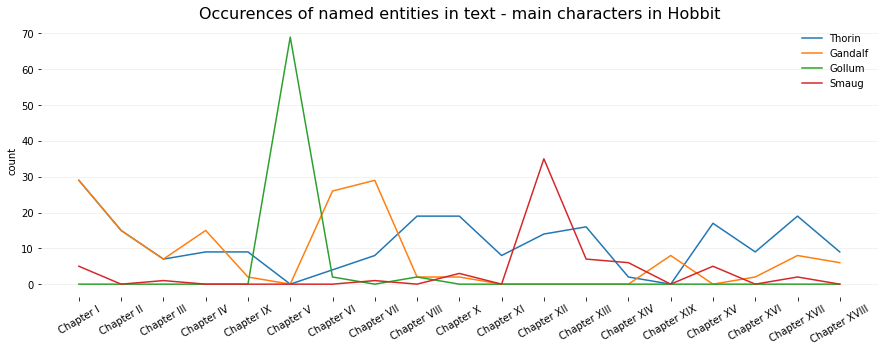

In [64]:
fig, ax = plt.subplots(figsize=(15,5))
for character in ['Thorin', 'Gandalf', 'Gollum', 'Smaug']: #'Bilbo', 
    df_plot = df_grouped[['chapter', character]]
    ax.plot(df_grouped['chapter'], df_grouped[character], label=character)
ax.legend(frameon=False)
ax.set_title('Occurences of named entities in text - main characters in Hobbit', fontsize=16)
ax.set_ylabel('count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(alpha=0.2)

ax.set_xticklabels(df_grouped['chapter'], rotation=30);

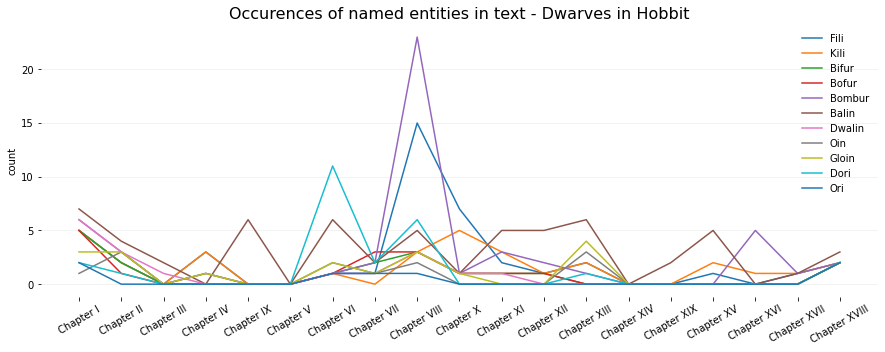

In [65]:
fig, ax = plt.subplots(figsize=(15,5))
for character in ['Fili', 'Kili', 'Bifur', 'Bofur', 'Bombur', 'Balin', 'Dwalin', 'Oin', 'Gloin', 'Dori', 'Ori']:
    df_plot = df_grouped[['chapter', character]]
    ax.plot(df_grouped['chapter'], df_grouped[character], label=character)
ax.legend(frameon=False)
ax.set_title('Occurences of named entities in text - Dwarves in Hobbit', fontsize=16)
ax.set_ylabel('count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(alpha=0.2)
ax.set_xticklabels(df_grouped['chapter'], rotation=30);

In [66]:
df_grouped.columns

Index(['chapter', 'Baggins', 'Dori', 'Bombur', 'Thror', 'Bofur', 'Balin',
       'Moria', 'Bifur', 'Thorin', 'Rivendell', 'Dorks', 'Dwarves', 'William',
       'Ori', 'Esgaroth', 'Beorn', 'Orcrist', 'Oin', 'Tom', 'Elrond',
       'Gondolin', 'Mirkwood', 'Gollum', 'Bert', 'Durin', 'Sackville',
       'Goblins', 'Smaug', 'Bagginses', 'Gandalf', 'Carrock', 'Wargs', 'Fili',
       'Bolg', 'Gloin', 'Dwalin', 'Oakenshield', 'Tookish', 'Kili'],
      dtype='object')

In [67]:
top_bilbo_chars = df_grouped.iloc[:,4:].sum().sort_values(ascending=False)[0:15].index

In [68]:
top_bilbo_chars

Index(['Thorin', 'Gandalf', 'Gollum', 'Smaug', 'Balin', 'Beorn', 'Fili',
       'Kili', 'William', 'Bert', 'Mirkwood', 'Elrond', 'Gloin', 'Dwalin',
       'Bifur'],
      dtype='object')

In [69]:
colors = ["#186A3B", "#1D8348", "#239B56", "#28B463", "#2ECC71", "#58D68D",
         "#82E0AA", "#ABEBC6", "#D5F5E3", "#FCF3CF", "#F9E79F", "#F7DC6F", "#F4D03F", "#F1C40F",
         "#D4AC0D", "#B7950B", "#9A7D0A", "#7D6608", "#7D6688"]

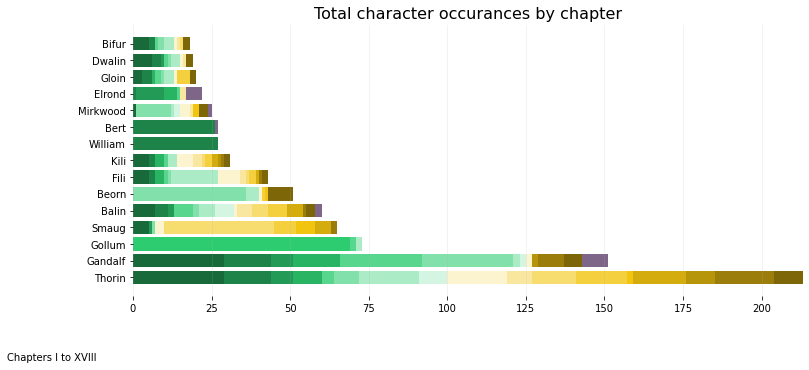

In [70]:
sums_by_chapter = {}
fig, ax = plt.subplots(figsize=(12, 5))
i = 0
sums_by_chapter = {}
for chap in df['chapter'].unique():
    df_plot = df[df['chapter'] == chap]
    for char in top_bilbo_chars:
        df_plot2 = df_plot.groupby('chapter', as_index=False).sum()

        value = df_plot2[char].values[0]

        
        
        if char not in sums_by_chapter.keys():
            sums_by_chapter[char] = 0
        ax.barh(y=char, width=value, left=sums_by_chapter[char], color=colors[i])
        
        sums_by_chapter[char] = value + sums_by_chapter[char]
        
    i += 1
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.grid(alpha=0.2)

ax.set_title('Total character occurances by chapter', fontsize=16)

sns.palplot(colors, size=0.2)
ax.text(s='Chapters I to XVIII', x=-40, y=-5);

---
Sentiment Analysis
---

In [71]:
if not SENTIMENT_ANALYSIS:
  while True:
    pass

In [72]:
# sentimen analysis
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [73]:
compound_scores = []
for sentence in df['sentence']:
    compound_scores.append(
        (sentence, 
         sid.polarity_scores(sentence)['compound'],
         sid.polarity_scores(sentence)['pos'],
         sid.polarity_scores(sentence)['neg'],
         sid.polarity_scores(sentence)['neu'])
        )

In [74]:
compound_scores[0]

('In a hole in the ground there lived a hobbit.', 0.0, 0.0, 0.0, 1.0)

In [75]:
import pprint
print("\nGOOD SENTENCES:\n")
count = 0
for element in compound_scores:
    if count >= 5:
      break

    if element[1] > 0:
        pprint.pprint(element)
        print("\n")
        count += 1

print("\nBAD SENTENCES:\n")
count = 0
for element in compound_scores:
    if count >= 5:
      break

    if element[1] < 0:
        pprint.pprint(element)
        print("\n")
        count += 1


GOOD SENTENCES:

('Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy '
 'smell, nor yet a dry, bare, sandy hole with nothing in it to sit down on or '
 'to eat: it was a hobbit-hole, and that means comfort.',
 0.7802,
 0.179,
 0.0,
 0.821)


('It had a perfectly round door like a porthole, painted green, with a shiny '
 'yellow brass knob in the exact middle.',
 0.7717,
 0.295,
 0.0,
 0.705)


('The door opened on to a tube-shaped hall like a tunnel: a very comfortable '
 'tunnel without smoke, with panelled walls, and floors tiled and carpeted, '
 'provided with polished chairs, and lots and lots of pegs for hats and '
 'coats—the hobbit was fond of visitors.',
 0.8399,
 0.191,
 0.0,
 0.809)


('No going upstairs for the hobbit: bedrooms, bathrooms, cellars, pantries '
 '(lots of these), wardrobes (he had whole rooms devoted to clothes), '
 'kitchens, dining-rooms, all were on the same floor, and indeed on the same '
 'passage.',
 0.128,
 0.071,
 0.058,
 0.871)


In [76]:
all_scores = []
for element in compound_scores:
    all_scores.append(element[1])

for element in compound_scores:
    if element[1] == max(all_scores):
        print('\nMost positive compound score was assigned to: \n', element)
    elif element[1] == min(all_scores):
        print('\nMost negative compound score assigned to: \n', element)


Most negative compound score assigned to: 
 ('There were lots of dragons in the North in those days, and gold was probably getting scarce up there, with the dwarves flying south or getting killed, and all the general waste and destruction that dragons make going from bad to worse.', -0.9559, 0.0, 0.322, 0.678)

Most positive compound score was assigned to: 
 ('Beorn was most jolly for a change; indeed he seemed to be in a splendidly good humour and set them all laughing with his funny stories; nor did they have to wonder long where he had been or why he was so nice to them, for he told them himself.', 0.9698, 0.353, 0.0, 0.647)


In [77]:
df['compound_score'] = [x[1] for x in compound_scores]
df['pos_score'] = [x[2] for x in compound_scores]
df['neg_score'] = [x[3] for x in compound_scores]
df['neu_score'] = [x[4] for x in compound_scores]

df.head(10)

,sentence,chapter,chapter_name,cleaned_sentence,tagged_sent,ne,named_entities,Luckwearer,Tooks,Baggins,Dori,Bombur,Calamities,Thror,Bofur,Balin,Moria,Bifur,Thorin,Rivendell,Dorks,Dwarves,William,Huggins,Ori,Esgaroth,Beorn,Orcrist,Oin,Bullroarer,Tom,Elrond,Gondolin,Mirkwood,Gollum,Bert,Durin,Ringwinner,Sackville,Grubb,Goblins,Smaug,Greatest,Bagginses,Hobbiton,Gandalf,Carrock,Wargs,Fili,Elven,Bolg,Gloin,Dwalin,Oakenshield,Wilderland,Tookish,Kili,chunk,chunks,compound_score,pos_score,neg_score,neu_score
0,In a hole in the ground there lived a hobbit.,Chapter I,AN UNEXPECTED PARTY,In a hole in the ground there lived a hobbit,"[(In, IN), (a, DT), (hole, NN), (in, IN), (the...","[(In, IN), (a, DT), (hole, NN), (in, IN), (the...",[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[(In, IN), (a, DT), (hole, NN), (in, IN), (the...",[],0.0000,0.000,0.000,1.000
1,"Not a nasty, dirty, wet hole, filled with the ...",Chapter I,AN UNEXPECTED PARTY,Not a nasty dirty wet hole filled with the end...,"[(Not, RB), (a, DT), (nasty, JJ), (dirty, NN),...","[(Not, RB), (a, DT), (nasty, JJ), (dirty, NN),...",[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[(Not, RB), (a, DT), (nasty, JJ), (dirty, NN),...",[],0.7802,0.179,0.000,0.821
2,"It had a perfectly round door like a porthole,...",Chapter I,AN UNEXPECTED PARTY,It had a perfectly round door like a porthole ...,"[(It, PRP), (had, VBD), (a, DT), (perfectly, R...","[(It, PRP), (had, VBD), (a, DT), (perfectly, R...",[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[(It, PRP), (had, VBD), (a, DT), (perfectly, R...",[],0.7717,0.295,0.000,0.705
3,The door opened on to a tube-shaped hall like ...,Chapter I,AN UNEXPECTED PARTY,The door opened on to a tube shaped hall like ...,"[(The, DT), (door, NN), (opened, VBD), (on, IN...","[(The, DT), (door, NN), (opened, VBD), (on, IN...",[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[(The, DT), (door, NN), (opened, VBD), (on, IN...",[],0.8399,0.191,0.000,0.809
4,"The tunnel wound on and on, going fairly but n...",Chapter I,AN UNEXPECTED PARTY,The tunnel wound on and on going fairly but no...,"[(The, DT), (tunnel, NN), (wound, NN), (on, IN...","[(The, DT), (tunnel, NN), (wound, NN), (on, IN...",[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[(The, DT), (tunnel, NN), (wound, NN), (on, IN...",[],-0.3235,0.000,0.050,0.950
5,"No going upstairs for the hobbit: bedrooms, ba...",Chapter I,AN UNEXPECTED PARTY,No going upstairs for the hobbit bedrooms bath...,"[(No, DT), (going, VBG), (upstairs, NN), (for,...","[(No, DT), (going, VBG), (upstairs, NN), (for,...",[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[(No, DT), (going, VBG), (upstairs, NN), (for,...",[],0.1280,0.071,0.058,0.871
6,The best rooms were all on the left-hand side ...,Chapter I,AN UNEXPECTED PARTY,The best rooms were all on the left hand side ...,"[(The, DT), (best, JJS), (rooms, NNS), (were, ...","[(The, DT), (best, JJS), (rooms, NNS), (were, ...",[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[(The, DT), (best, JJS), (rooms, NNS), (were, ...",[],0.6369,0.110,0.000,0.890
7,"This hobbit was a very well-to-do hobbit, and ...",Chapter I,AN UNEXPECTED PARTY,This hobbit was a very well to do hobbit and h...,"[(This, DT), (hobbit, NN), (was, VBD), (a, DT)...","[(This, DT), (hobbit, NN), (was, VBD), (a, DT)...",[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[(This, DT), (hobbit, NN), (was, VBD), (a, DT)...",[],0.0000,0.000,0.000,1.000
8,The Bagginses had lived in the neighbourhood o...,Chapter I,AN UNEXPECTED PARTY,The Bagginses had lived in the neighbourhood o...,"[(The, 

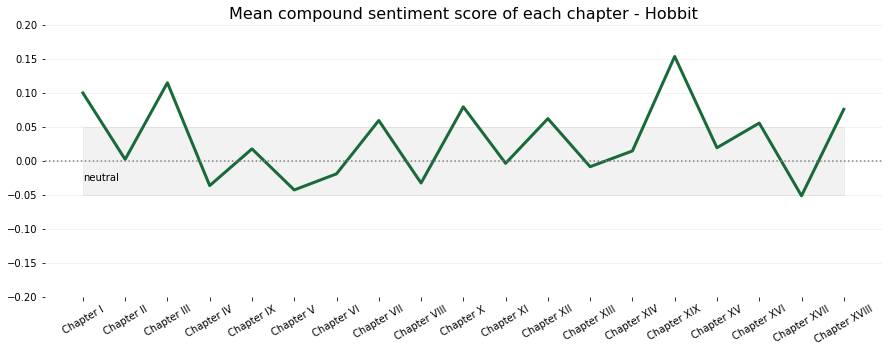

In [78]:

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df.groupby('chapter').mean()['compound_score'].index,
        df.groupby('chapter').mean()['compound_score'].values, linewidth=3, color="#186A3B")
ax.set_xticklabels(df.groupby('chapter').mean()['compound_score'].index,
                   rotation=30)
ax.set_ylim(-0.2, 0.2)
ax.axhline(y=0, linestyle=':', color='grey')
ax.set_title('Mean compound sentiment score of each chapter - Hobbit', fontsize=16)
ax.spines['top'].set_visible(False)
ax.fill_between(x=ax.get_xticks(), y1=-0.05, y2=0.05, color='grey', alpha=0.1)
ax.spines['right'].set_visible(False)
ax.text(x=0, y=-0.03, s='neutral')
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(alpha=0.2);

In [79]:
# dropping the pos, neg, neu scores returned from Vader and assigning them based on compound score thresholds.
df['pos_score'] = np.where(df['compound_score'] >= 0.05, 1, 0)
df['neg_score'] = np.where(df['compound_score'] <= -0.05, 1, 0)
df['neu_score'] = np.where((df['compound_score'] > -0.05) &
                           (df['compound_score'] < 0.05), 1, 0)

In [80]:
len(df[df['pos_score'] == 1])

1659

In [81]:
len(df[df['neg_score'] == 1])

1507

In [82]:
len(df[df['neu_score'] == 1])

2712

In [83]:
# to solve the problem with df.groupby('chapter').nunique()
df = df.drop(columns=['tagged_sent'])
df = df.drop(columns=['ne'])

TypeError: ignored

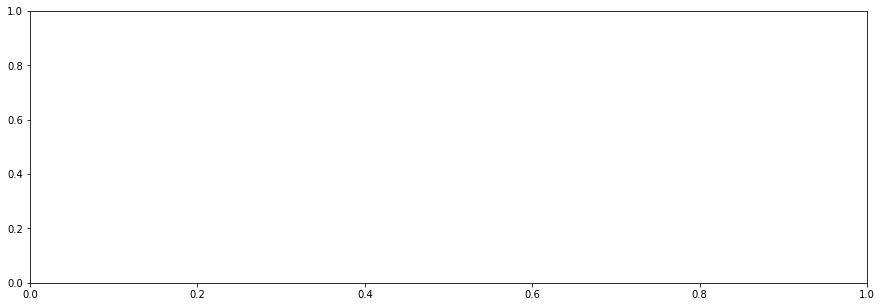

In [85]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x=df.groupby('chapter').nunique()['sentence'].index, height=df.groupby('chapter').nunique()['sentence'].values, alpha=0.7, color='#186A3B')
ax.set_xticklabels(df['chapter'].unique(),
                   rotation=30)
ax.set_title('Sentence count per chapter - Hobbit', fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(alpha=0.2);

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x=df[df['pos_score'] == 1].groupby('chapter').nunique()['sentence'].index, 
        height=df[df['pos_score'] == 1].groupby('chapter').nunique()['sentence'].values / df.groupby('chapter').nunique()['sentence'] * 100, alpha=0.8,
      label='positive', color='#186A3B')

ax.bar(x=df[df['neu_score'] == 1].groupby('chapter').nunique()['sentence'].index, 
        height=df[df['neu_score'] == 1].groupby('chapter').nunique()['sentence'].values / df.groupby('chapter').nunique()['sentence'] * 100, alpha=0.3,
       bottom=df[df['pos_score'] == 1].groupby('chapter').nunique()['sentence'].values / df.groupby('chapter').nunique()['sentence'] * 100,
       label='neutral', color='#FCF3CF')

ax.bar(x=df[df['neg_score'] == 1].groupby('chapter').nunique()['sentence'].index, 
        height=df[df['neg_score'] == 1].groupby('chapter').nunique()['sentence'].values / df.groupby('chapter').nunique()['sentence'] * 100,
       bottom=(df[df['neu_score'] == 1].groupby('chapter').nunique()['sentence'].values / df.groupby('chapter').nunique()['sentence'] * 100) +
       (df[df['pos_score'] == 1].groupby('chapter').nunique()['sentence'].values / df.groupby('chapter').nunique()['sentence'] * 100),
       label='negative', color='#D4AC0D')


ax.legend(frameon=False, bbox_to_anchor=(1, 0.5))

ax.set_xticklabels(df['chapter'].unique(),
                   rotation=30)
ax.set_title('Sentece sentiment by chapter - Hobbit', fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('[%]')
ax.yaxis.grid(alpha=0.2);

In [ ]:
df['sentence_length'] = df['sentence'].apply(lambda x: len(x.split(' ')))
df.head(10)

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x=df.groupby('chapter').nunique()['sentence_length'].index, 
        height=df.groupby('chapter').nunique()['sentence_length'].values, alpha=0.7, color='#186A3B')
ax.set_xticklabels(df['chapter'].unique(),
                   rotation=30)
ax.set_title('Avg. sentence length - Hobbit', fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(alpha=0.2)
ax.set_ylabel('words');

In [ ]:
df['pos'] = np.where(df['pos_score'] > df['neg_score'], 1, 0)
df['neg'] = np.where(df['pos_score'] < df['neg_score'], 1, 0)
df['neu'] = np.where(df['pos_score'] == df['neg_score'], 1, 0)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

for char in top_bilbo_chars:
    char_df = df[df[char] != 0].loc[:, ['pos', 'neg', 'neu']].sum() / len(df[df[char] != 0]) * 100
    ax.barh(y=char, width=char_df.loc['pos'], color='#186A3B', label='positive')
    ax.barh(y=char, width=char_df.loc['neu'], left=char_df.loc['pos'], color='#FCF3CF', alpha=0.3, label='neutral')
    ax.barh(y=char, width=char_df.loc['neg'], left=char_df.loc['pos'] + char_df.loc['neu'], color='#D4AC0D', 
            label='negative')
    
ax.legend(['positive', 'neutral', 'negative'], frameon=False, bbox_to_anchor=(1.2,0.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('[%]')
ax.set_title('Sentences with character mention divided by sentiment', fontsize=16);